# OpenCV 및 시각화 라이브러리 불러오기

In [2]:
import cv2
from matplotlib import pyplot as plt

## 1. 이미지 읽어보기. 업로드, 인스턴스에 로드

In [2]:
img = cv2.imread("./pikachu-lightning.jpg")

### 읽어온 이미지 화면에 표시

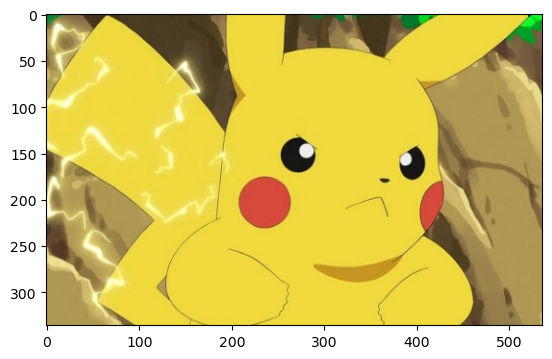

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

# 2. 확대 & 축소

## 2-1. 비율로 확대 및 축소

In [4]:
big_img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR) # 2배
sml_img = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA) # 2배

# 보간법(interpolation): 주어진 데이터 포인트들 사이의 누락된 값을 추정하거나, 데이터를 부드럽게 만들기 위해 사용
# 이미지를 확대하는 경우: 바이큐빅 보간법, 쌍 선형 보간법 사용
# 이미지를 축소하는 경우: 영역 보간법 사용

### 시각화

In [5]:
# 실제 이미지 크기대로 각각 출력해 주는 함수 작성
def show_image_in_actual_size(img, title="Image"):
    dpi = plt.rcParams['figure.dpi']
    height, width = img.shape[:2]
    figsize = width / float(dpi), height / float(dpi)

    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img, aspect = 'auto')
    plt.title(title)
    plt.show()

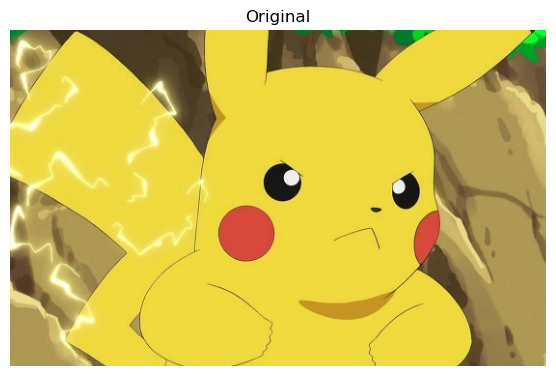

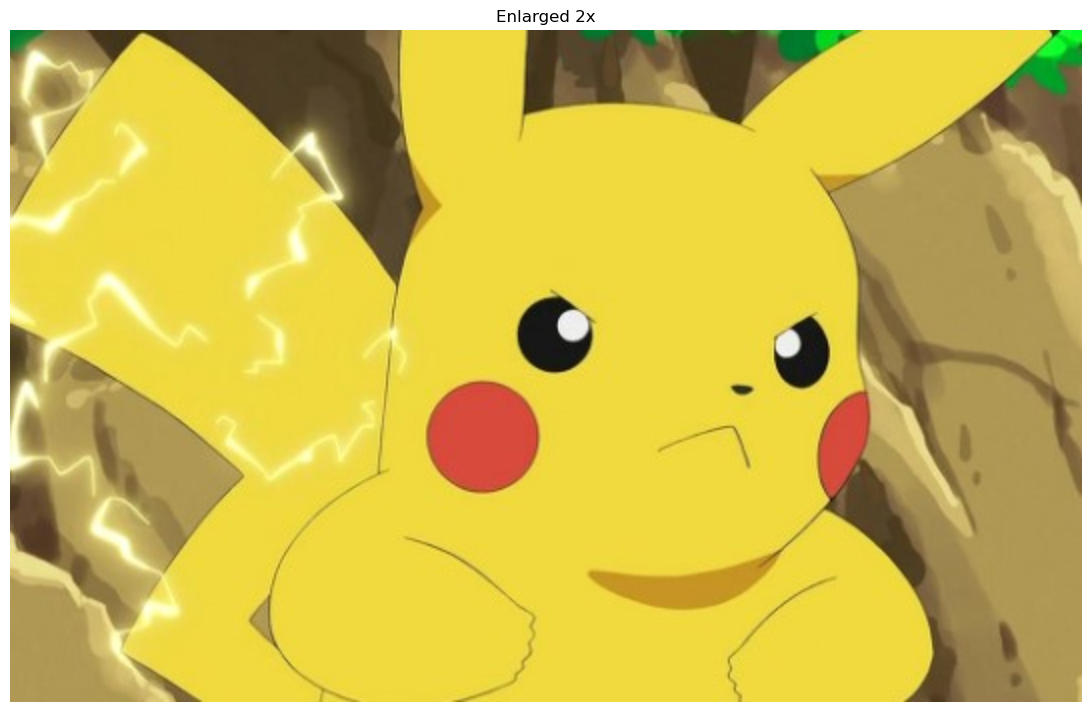

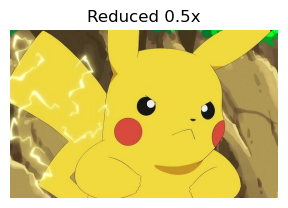

In [6]:
# 원본 이미지 표시
show_image_in_actual_size(img, "Original")

# 2배 확대 이미지 표시
show_image_in_actual_size(big_img, "Enlarged 2x")

# 2배 축소 이미지 표시
show_image_in_actual_size(sml_img, "Reduced 0.5x")

## 2-2. 절대크기로 조정

In [7]:
resized_img1 = cv2.resize(img, (50, 200), interpolation=cv2.INTER_AREA)
resized_img2 = cv2.resize(img, (600, 300), interpolation=cv2.INTER_LINEAR)

### * 데이터 크기 확인

In [8]:
print("원본: ", img.shape)
print("조정본 1: ", resized_img1.shape)
print("조정본 2: ", resized_img2.shape)

원본:  (336, 536, 3)
조정본 1:  (200, 50, 3)
조정본 2:  (300, 600, 3)


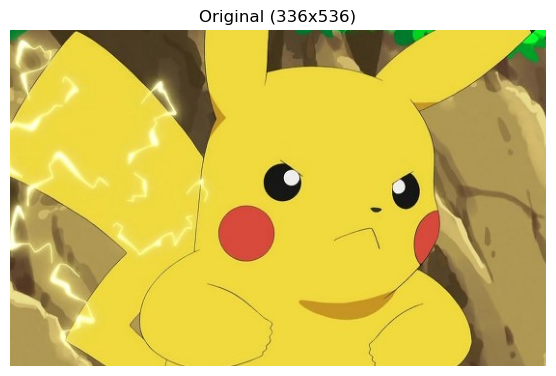

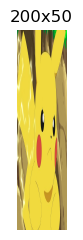

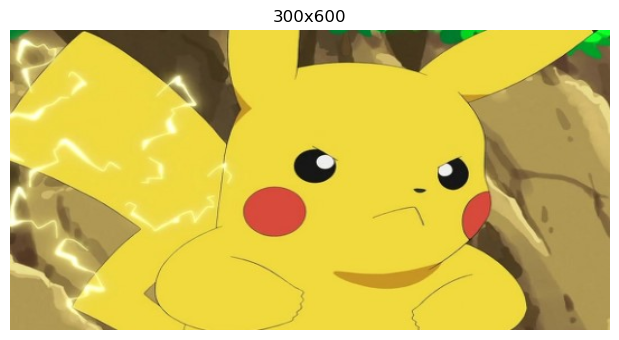

In [9]:
# 원본 이미지 표시
show_image_in_actual_size(img, "Original (336x536)")

# 2배 확대 이미지 표시
show_image_in_actual_size(resized_img1, "200x50")

# 2배 축소 이미지 표시
show_image_in_actual_size(resized_img2, "300x600")

## 3. 색 공간 변환

cv2COLOR_<원본 색 공간명>2<목표 색 공간명> 명령어를 사용하면 각 색 공간을 서로 변환할 수 있게 됩니다. (대문자로 작성해야 함)

### 그레이스케일로 변환해 봅시다. 
- 높은 값=흰색, 낮은 값=검은색
- 색 -> 흑백은 가능하지만, 명도만 있는 흑백 -> 색은 불가능.

<function matplotlib.pyplot.show(close=None, block=None)>

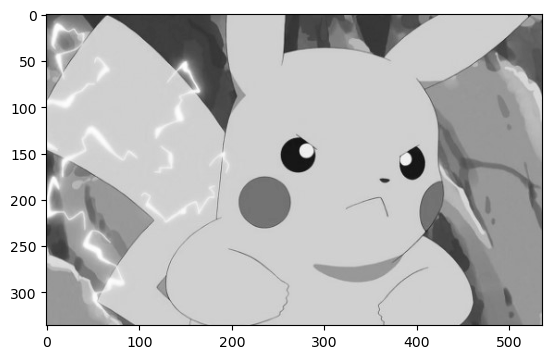

In [10]:
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show

## 4. 이미지 반전

### 이미지를 좌우, 상하 또는 상하좌우로 변환
- cv2.flip(img,'정수')
- 숫자 상관 없이 양수 = 좌우 반전
- 숫자 상관 없이 음수 = 상하좌우 반전
- 0 = 상하 반전

- 좌우, 상하, 상하좌우 반전 통해 데이터를 증강 시킬 수 있음.

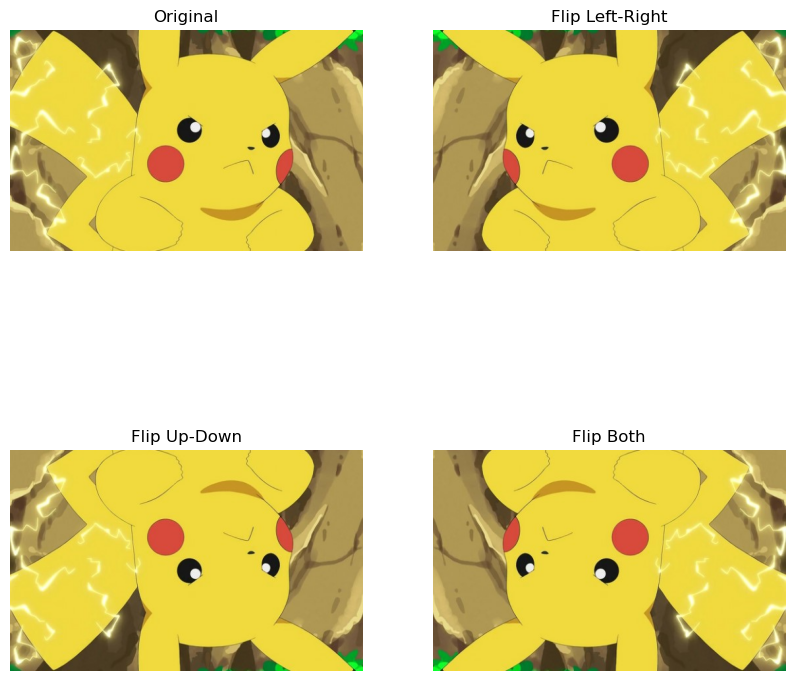

In [11]:
# 좌우 반전
img_filp_lr = cv2.flip(img,1)

# 상하 반전
img_filp_up = cv2.flip(img,0)

# 상하좌우 반전
img_filp_both = cv2.flip(img,-1)

# 2x2 subplot 생성
plt.figure(figsize=(10, 10))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 좌우 반전 이미지
plt.subplot(2, 2, 2)
plt.imshow(img_filp_lr)
plt.title('Flip Left-Right')
plt.axis('off')

# 상하 반전 이미지
plt.subplot(2, 2, 3)
plt.imshow(img_filp_up)
plt.title('Flip Up-Down')
plt.axis('off')

# 상하좌우 반전 이미지
plt.subplot(2, 2, 4)
plt.imshow(img_filp_both)
plt.title('Flip Both')
plt.axis('off')

# 이미지 표시
plt.show()

## 변환행렬 생성

1) 회전 행렬 생성 함수로 회전 변환 행렬을 계산
   - cv2.getRotationMatrix2D(center, angle, scale) 함수 사용
   - center : 회전의 중심, angle : 회전 각도, scale : 이미지 스케일
2) 계산한 변환 행렬로 이미지 회전
   - cv2.warpAffine(이미지, M, dsize) 함수 사용
   - M : 변환 행렬, dsize : 출력 이미지의 크기(패러미터 미기재시 원본크기)


In [12]:
rows, cols = img.shape[:2] # 행 수/열 수/채널 순이므로, 행과 열 수만을 가져오기

In [13]:
# 회전율 위한 변환행렬 생성
M1 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 45, 1) # 중심점에서 45도 회전, 스케일은 1
M2 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1) # 중심점에서 90도 회전, 스케일은 1
M3 = cv2.getRotationMatrix2D((cols / 2, rows / 2), 135, 1.5) # 중심점에서 135도 회전, 스케일은 1.5

In [14]:
# 변환 행렬을 사용하여 이미지 회전
rotated_img1 = cv2.warpAffine(img, M1, (cols, rows))
rotated_img2 = cv2.warpAffine(img, M2, (cols, rows))
rotated_img3 = cv2.warpAffine(img, M3, (cols, rows))

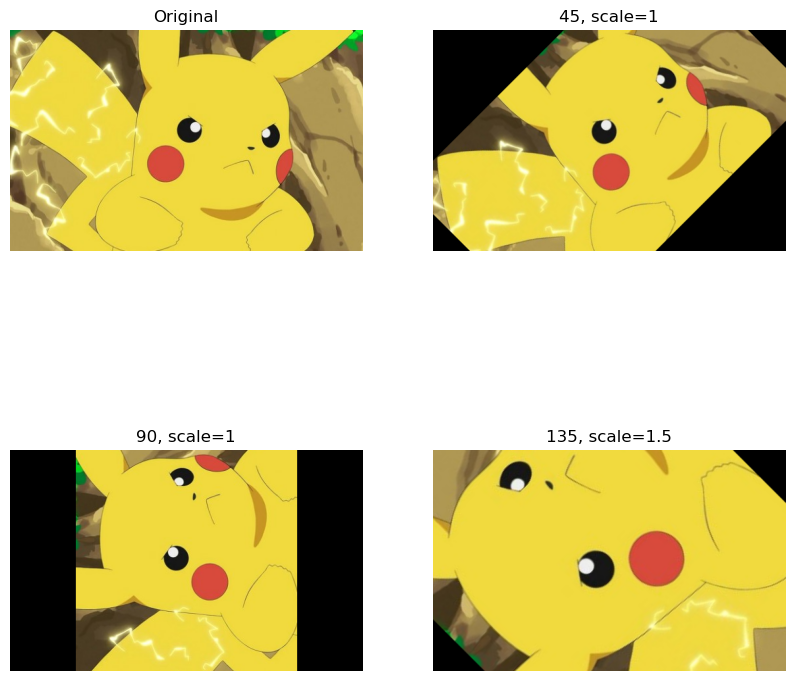

In [15]:
# 이미지 시각화
plt.figure(figsize=(10, 10))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 45도 회전
plt.subplot(2, 2, 2)
plt.imshow(rotated_img1)
plt.title('45, scale=1')
plt.axis('off')

# 90도 회전
plt.subplot(2, 2, 3)
plt.imshow(rotated_img2)
plt.title('90, scale=1')
plt.axis('off')

# 135도 회전
plt.subplot(2, 2, 4)
plt.imshow(rotated_img3)
plt.title('135, scale=1.5')
plt.axis('off')

# 이미지 표시
plt.show()

- 회전으로 인해 나타나는 검은색을 그대로 모델에 사용 시 모델이 특징으로 학습할 수 있으므로 제거 필요 -> 계산을 통해 그림 늘리기, 이미지에서 특정 부분만 자르고 원하는 부분만 취함(이미지 마스킹), 검은색 부분을 랜덤한 값으로 채움, 정규분포를 통해 명도를 칠함 등등이 있음

## 6. 이미지 자르기

### 관심 있는 특정 영역만을 잘라내 봅시다.

In [16]:
crop_img = img[100:250, 225:425].copy()

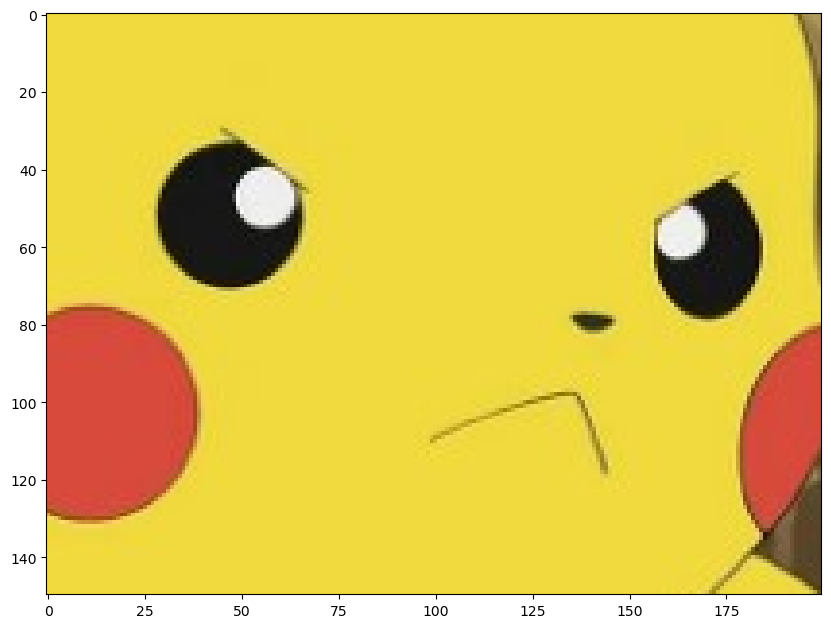

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(crop_img)
plt.show()

## 7. 가장자리 검출

### 전경과 배경이 구분되는 지점, 즉 밝기가 큰 폭으로 변하는 지점이 가장자리.
- 소벨(Sobel), 라플라시안(Laplacian), 캐니(Canny)의 3가지 함수가 존재
- 그레이스케일화된 이미지로 수행

1) 소벨, 2) 라플라시안: 
   - ddepth -> 출력 이미지 깊이. 비트 깊이. U -->정수, F -->부동 소수점. 
   - ksize -> 단위 윈도우의 크기. 중간값이 필요하기에 홀수 입력(1~31)
   - scke -> 미분 결과값에 대한 전체적인 보정값. 경계 가장자리를 부드럽게/선명하게 만들 수 있음.
   - delta -> 이미지 밝기 조절.

3) 캐니:
   - treshold2값을 기준으로 가장자리 판별. 소벨을 근본으로 하여 활용. 

In [18]:
sobel = cv2.Sobel(gray_img, cv2.CV_32F, 2, 1, 5, cv2.BORDER_WRAP) #dx 높으면 선 흐려짐. # 테두리 외삽법 조정 시 큰 차이 발견 못함.
laplacian = cv2.Laplacian(gray_img, cv2.CV_16U, ksize=17) # ksize: 과하게 낮거나 높으면 더 흐려짐.
canny = cv2.Canny(gray_img, 50, 255) # threshold1 > threshold2 경우 선이 흐려짐.

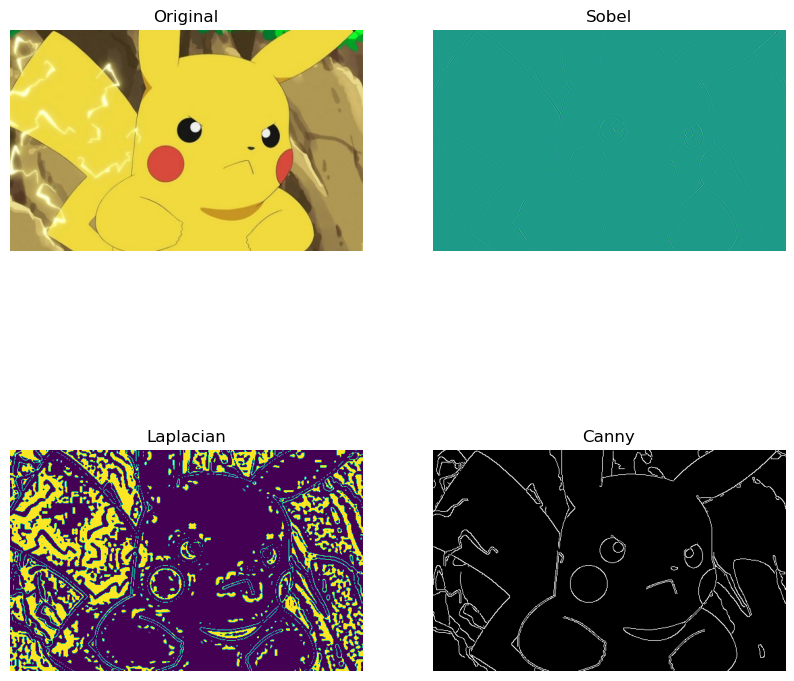

In [19]:
# 이미지 시각화
plt.figure(figsize=(10, 10))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 소벨
plt.subplot(2, 2, 2)
plt.imshow(sobel)
plt.title('Sobel')
plt.axis('off')

# 9라플라시안
plt.subplot(2, 2, 3)
plt.imshow(laplacian)
plt.title('Laplacian')
plt.axis('off')

# 캐니
plt.subplot(2, 2, 4)
plt.imshow(canny, cmap = 'gray')
plt.title('Canny')
plt.axis('off')

# 이미지 표시
plt.show()

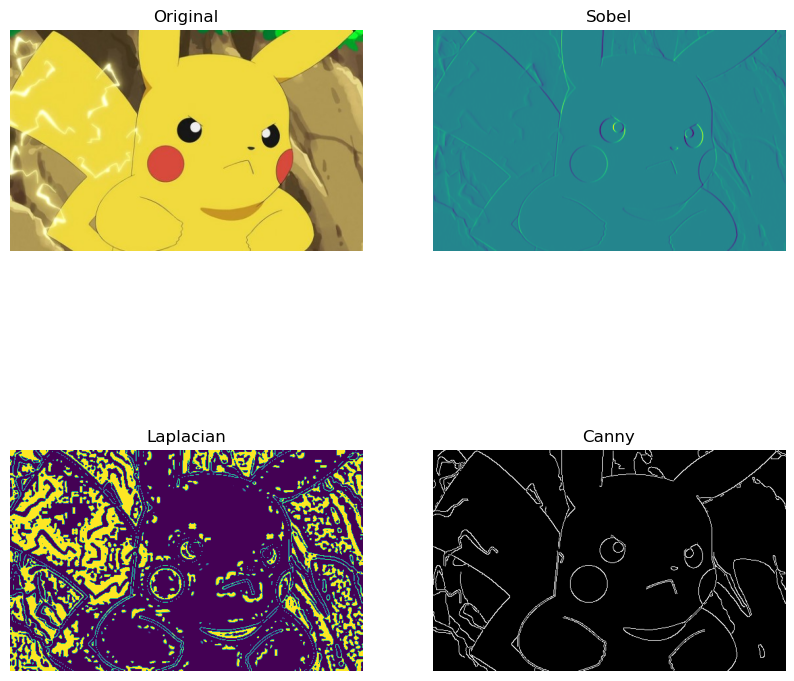

In [20]:
sobel = cv2.Sobel(gray_img, cv2.CV_32F, 1, 0, 5, cv2.BORDER_WRAP) #dx 높으면 선 흐려짐. # 테두리 외삽법 조정 시 큰 차이 발견 못함.
laplacian = cv2.Laplacian(gray_img, cv2.CV_16U, ksize=17) # ksize: 과하게 낮거나 높으면 더 흐려짐.
canny = cv2.Canny(gray_img, 50, 255) # threshold1 > threshold2 경우 선이 흐려짐.

# 이미지 시각화
plt.figure(figsize=(10, 10))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title('Original')
plt.axis('off')

# 소벨
plt.subplot(2, 2, 2)
plt.imshow(sobel)
plt.title('Sobel')
plt.axis('off')

# 9라플라시안
plt.subplot(2, 2, 3)
plt.imshow(laplacian)
plt.title('Laplacian')
plt.axis('off')

# 캐니
plt.subplot(2, 2, 4)
plt.imshow(canny, cmap = 'gray')
plt.title('Canny')
plt.axis('off')

# 이미지 표시
plt.show()

## 이진화(binarizaion)

### 인터넷에서 검/흰 이미지 업로드

- cv2.threshold(이미지, thresh, maxval, type)함수 사용
    - cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY) 로 구성 -> 픽셀 값이 100 이상이면 255로 변경, 미만이라면 0으로 변경.

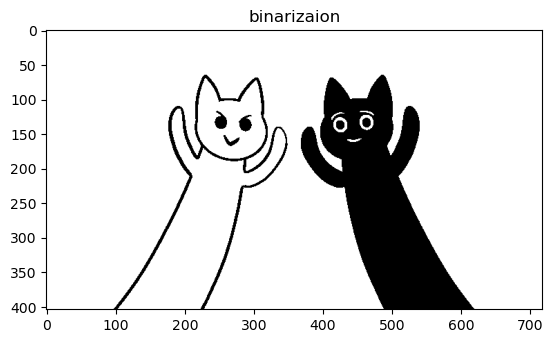

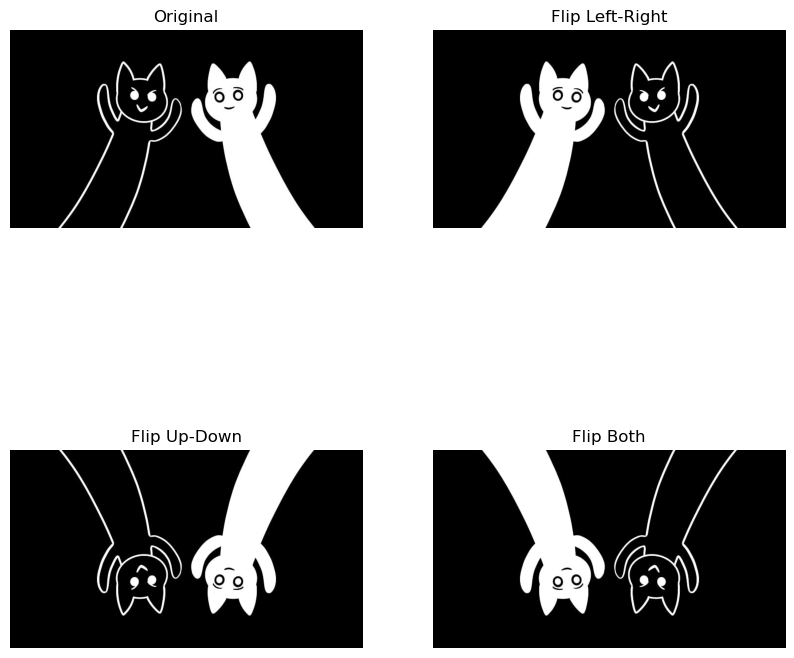

In [21]:
cat_orig = cv2.imread('black_white.jpg')

# 그레이스케일화 필요
cat = cv2.cvtColor(cat_orig, cv2.COLOR_RGB2GRAY)
ret, binary = cv2.threshold(cat, 100, 255, cv2.THRESH_BINARY)
binary = cv2.bitwise_not(binary)
plt.title('binarizaion')
plt.imshow(binary, cmap='gray')

# 좌우 반전
cat_filp_lr = cv2.flip(cat,1)

# 상하 반전
cat_filp_up = cv2.flip(cat,0)

# 상하좌우 반전
cat_filp_both = cv2.flip(cat,-1)

# 2x2 subplot 생성
plt.figure(figsize=(10, 10))

# 원본 이미지
plt.subplot(2, 2, 1)
plt.imshow(cat_orig, cmap='gray')
plt.title('Original')
plt.axis('off')

# 좌우 반전 이미지
plt.subplot(2, 2, 2)
plt.imshow(cat_filp_lr, cmap='gray')
plt.title('Flip Left-Right')
plt.axis('off')

# 상하 반전 이미지
plt.subplot(2, 2, 3)
plt.imshow(cat_filp_up, cmap='gray')
plt.title('Flip Up-Down')
plt.axis('off')

# 상하좌우 반전 이미지
plt.subplot(2, 2, 4)
plt.imshow(cat_filp_both, cmap='gray')
plt.title('Flip Both')
plt.axis('off')

# 이미지 표시
plt.show()

## 9. 윤곽선 검출
- 이진화 이미지의 경계선을 찾기 위한 방법.
- RETR_CCOMP -> 2차 윤곽선까지만 검출 가능
- RETR_TREE -> 2차 이상의 전체 윤곽선 검출 가능

### 윤곽선을 검출하려면, 반드시 이진화 후 진행!

!! 주의 !! findContours 함수는 흰색의 물체 검출.
만약 배경이 흰색이고, 개체가 검은색일 경우, 색 반전을 시켜줘야 함.

In [22]:
binary = cv2.bitwise_not(binary) # 색 반전

## 9-1. 최외곽 윤곽선 검출

In [23]:
contours, hierarchy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

### 차례로 윤곽선과 번호 그리기

In [24]:
# 윤곽선과 번호 그리기
for i in range(len(contours)):
    # 윤곽선 그리기
    cv2.drawContours(cat_orig, [contours[i]], 0, (255, 0, 255), 1)
    cv2.putText(cat_orig, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.6, (255, 255, 0),1)

    # cv2.putText(cat_orig, str(i), tuple(contours[i][0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8 -> 폰트 크기(한 번 바꾸면 돌이킬 수 없음), (255, 255, 0),1)    

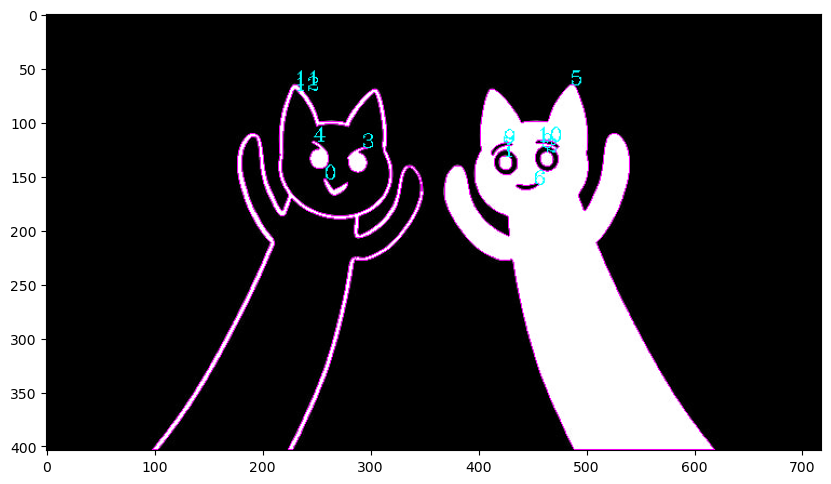

In [25]:
# matplotlib를 이용한 이미지 시각화
plt.figure(figsize=(10, 10)) #이미지 크기 조정
plt.imshow(cv2.cvtColor(cat_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [34]:
hierarchy

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [11,  4,  6, -1],
        [ 7, -1, -1,  5],
        [ 8,  6, -1,  5],
        [ 9,  7, -1,  5],
        [10,  8, -1,  5],
        [-1,  9, -1,  5],
        [-1,  5, 12, -1],
        [-1, -1, -1, 11]]], dtype=int32)

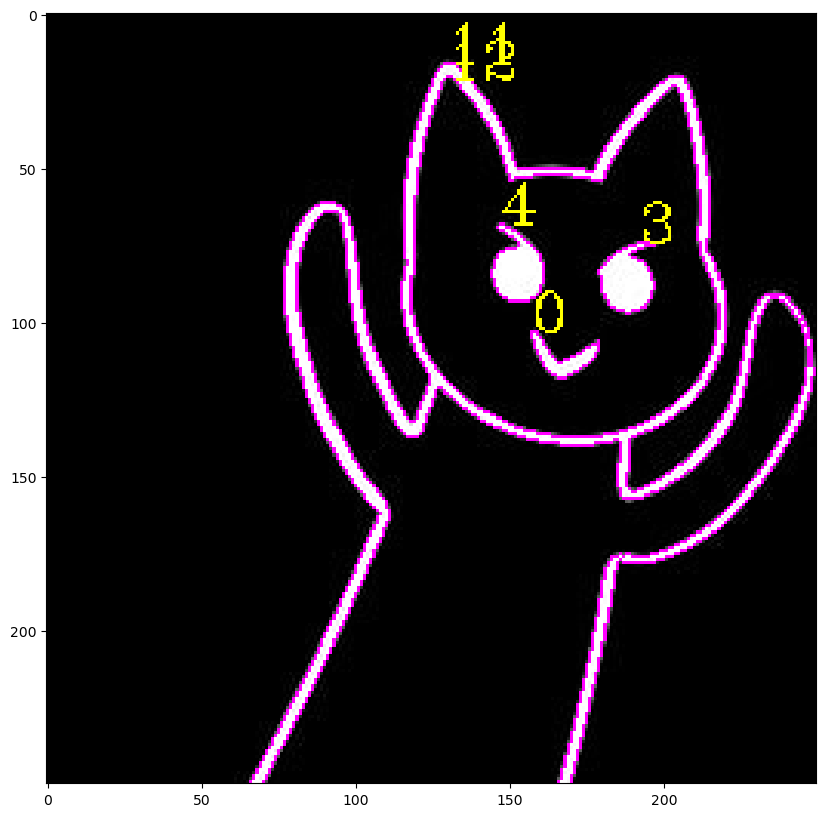

In [33]:
cat_img = cat_orig[50:300, 100:350].copy()
plt.figure(figsize=(10, 10))
plt.imshow(cat_img)
plt.show()

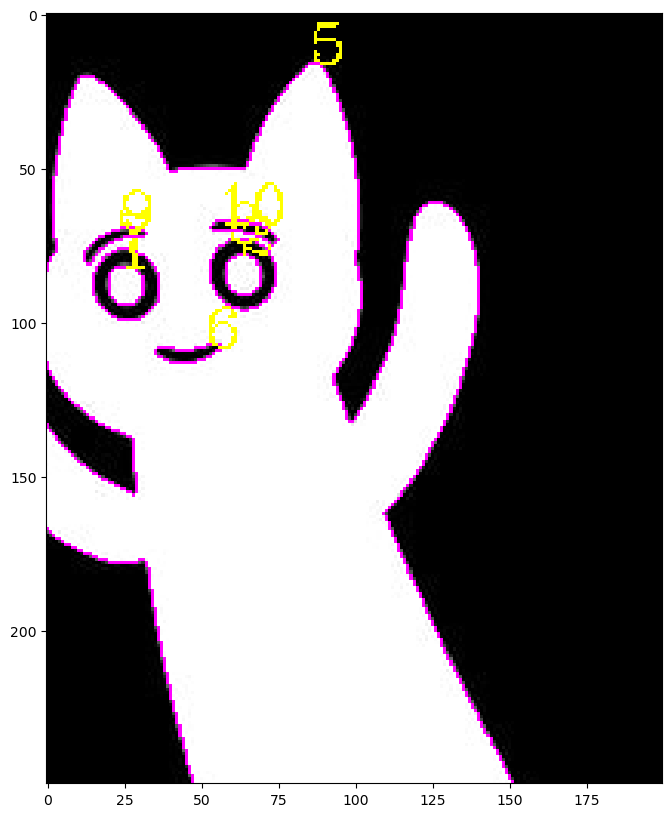

In [26]:
cat_img = cat_orig[50:300, 400:600].copy()
plt.figure(figsize=(10, 10))
plt.imshow(cat_img)
plt.show()

In [27]:
hierarchy #[다음 윤곽선, 이전 윤곽선, 내측 윤곽선, 외측 윤곽선] / -1: 존재x

array([[[ 1, -1, -1, -1],
        [ 2,  0, -1, -1],
        [ 3,  1, -1, -1],
        [ 4,  2, -1, -1],
        [ 5,  3, -1, -1],
        [11,  4,  6, -1],
        [ 7, -1, -1,  5],
        [ 8,  6, -1,  5],
        [ 9,  7, -1,  5],
        [10,  8, -1,  5],
        [-1,  9, -1,  5],
        [-1,  5, 12, -1],
        [-1, -1, -1, 11]]], dtype=int32)

#### 스캔한 이미지를 통해 글자를 인식하는 딥러닝 알고리즘을 만들려고 할 때, 이 알고리즘의 입력 이미지가 어떤 특성을 가져야 할지 생각해 보고, 다양한 방향으로 스캔된 이미지를 용지 방향에 맞추고, 210x297(가상 크기)의 입력 이미지로 바꾸는 openCV 코드를 구현

---
세로 용지 기준으로 설정했으며, 
45, 75도 등에 대한 고려가 어려워 일괄적으로 세로용지에 맞추기 위해 가로가 더 긴 경우만 고려하여 회전 방향을 설정했습니다.
밑의 예시로 넣은 이미지는 기존에 가로가 길게 설정된 이미지로 회전 시에 검은 부분이 너무 많이 나타나는 문제가 발생했습니다.
어떻게 해결을 해야할지 어려워 이 부분까지는 해결하지 못했습니다.



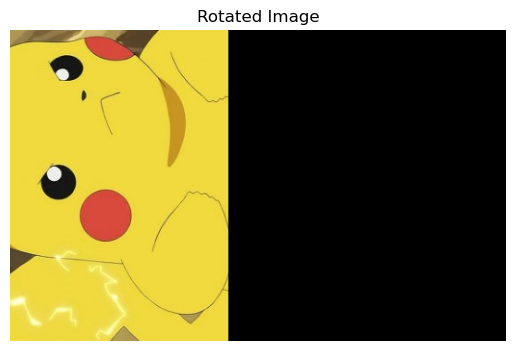

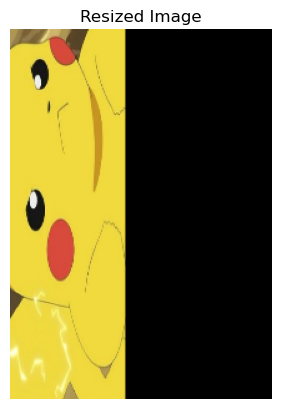

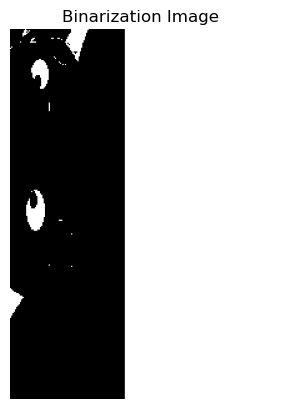

In [65]:
# 우선적으로 스캔한 이미지가 고해상도여야 한다.

import cv2
from matplotlib import pyplot as plt

# 모든 이미지가 동일한 방향으로 될 수 있도록 회전해야 한다.
def rotate_image(image):
    # 세로, 가로 길이
    height, width = image.shape[:2]
    # 변환행렬 계산
    rotationMatrix = (height/2, width/2)
    # 용지 방향에 맞춰야 하므로 가로 방향이 더 긴 경우에만 회전 -> 세로 용지 기준
    angle = 90 if width > height else 0 
    # 변환행렬 생성
    M = cv2.getRotationMatrix2D(rotationMatrix, angle, 1.0)
    # 변환행렬에 따라 회전
    rotated_img = cv2.warpAffine(image, M, (width, height))
    return rotated_img

# 입력 이미지는 모두 동일한 일정 크기를 가져야 한다. - 고정 수치로 확대 or 축소 요구됨.
def resize_image(image, width, height):
    resized_img = cv2.resize(image, (width, height))
    return resized_img

# 이진화를 위한 그레이스케일로의 변환이 요구된다.
def binarizaion(image):
    # 그레이스케일로 변환
    grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # 이진화
    ret, binary = cv2.threshold(grayscale, 100, 255, cv2.THRESH_BINARY)
    binary = cv2.bitwise_not(binary)
    return binary

# 이미지 읽기
image = cv2.imread('pikachu-lightning.jpg')

# 방향 전환
rotated_image = rotate_image(image)

# 이미지 크기 조정
width, height = 210, 297 # 가상의 크기
resized_image = resize_image(rotated_image, width, height)

# 이진화
binarizaion_img = binarizaion(resized_image)

# 결과 표시
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.axis('off')
plt.show()

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

plt.imshow(binarizaion_img, cmap='gray')
plt.title('Binarization Image')
plt.axis('off')
plt.show()